First I will check SIMC datasets. 
This EDA will follow steps in https://r4ds.hadley.nz/eda
First question is "What type of variation occurs within my variables?"
Before I answer this question, I'll look through datasets.
First thing to do is check whether all csv have same features. 

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [14]:
csv_folder = r"C:\Users\sprin\Downloads\SIMC_OverlapTiffsWithPP\SIMC_OverlapTiffsWithPP\SIMC.Overlap.csv"

csv_files = [f for f in os.listdir(csv_folder) if f.endswith(".csv")]

In [ ]:


first_csv = pd.read_csv(os.path.join(csv_folder, csv_files[0]))
reference_columns = set(first_csv.columns)

# Check all other CSVs
inconsistent_files = []
for csv_file in csv_files[1:]:
    df = pd.read_csv(os.path.join(csv_folder, csv_file))
    if set(df.columns) != reference_columns:
        inconsistent_files.append(csv_file)

if inconsistent_files:
    print("The following files have inconsistent columns:", inconsistent_files)
else:
    print("All CSV files have the same columns.")

The following files have inconsistent columns: ['20190503_SIMC_009_2mm_rep2_KG_data.csv', '20190506_SIMC_017_2mm_rep3_KG_data.csv', '20190508_SIMC_045_2mm_rep3_KG_data.csv', '20190508_SIMC_047_2mm_rep1_KG_data.csv', '20190514_SIMC_051_2mm_rep3_KG_data.csv', '20190514_SIMC_055_2mm_rep1_KG_data.csv', '20190515_SIMC_069_2mm_rep3_KG_data.csv', '20190523_SIMC_107_2mm_rep3_KG_data.csv', '20190527_SIMC_115_2mm_rep1_KG_data.csv']


Since we got some csvs having different features, we'll figure out what columns they have extra or missed.

In [4]:
column_sets = {}

for csv_file in csv_files:
    df = pd.read_csv(os.path.join(csv_folder, csv_file))
    column_sets[csv_file] = set(df.columns)

# Compare all CSV column sets
for file, columns in column_sets.items():
    if columns != reference_columns:
        missing = reference_columns - columns
        extra = columns - reference_columns
        print(f"\nFile: {file}")
        if missing:
            print(f"  Missing columns: {missing}")
        if extra:
            print(f"  Extra columns: {extra}")


File: 20190503_SIMC_009_2mm_rep2_KG_data.csv
  Extra columns: {'Biovolume..P..Spheroid.', 'Biovolume..Sphere.', 'Biovolume..Cylinder.'}

File: 20190506_SIMC_017_2mm_rep3_KG_data.csv
  Extra columns: {'Biovolume..P..Spheroid.', 'Biovolume..Sphere.', 'Biovolume..Cylinder.'}

File: 20190508_SIMC_045_2mm_rep3_KG_data.csv
  Extra columns: {'Biovolume..P..Spheroid.', 'Biovolume..Sphere.', 'Biovolume..Cylinder.'}

File: 20190508_SIMC_047_2mm_rep1_KG_data.csv
  Extra columns: {'Biovolume..P..Spheroid.', 'Biovolume..Sphere.', 'Biovolume..Cylinder.'}

File: 20190514_SIMC_051_2mm_rep3_KG_data.csv
  Extra columns: {'Biovolume..P..Spheroid.', 'Biovolume..Sphere.', 'Biovolume..Cylinder.'}

File: 20190514_SIMC_055_2mm_rep1_KG_data.csv
  Extra columns: {'Biovolume..P..Spheroid.', 'Biovolume..Sphere.', 'Biovolume..Cylinder.'}

File: 20190515_SIMC_069_2mm_rep3_KG_data.csv
  Extra columns: {'Biovolume..P..Spheroid.', 'Biovolume..Sphere.', 'Biovolume..Cylinder.'}

File: 20190523_SIMC_107_2mm_rep3_KG_data

Since there are some csv files containing extra three columns, and there are only 9 files out of 251 files, we'll drop features for EDA and further on. 
Now, I will check whether columns are in same order to combine csv files in one. 

In [5]:
order_mismatch_files = []
reference_columns_ordered = list(pd.read_csv(os.path.join(csv_folder, csv_files[0])).columns)

for csv_file in csv_files:
    df = pd.read_csv(os.path.join(csv_folder, csv_file))
    if list(df.columns) != reference_columns_ordered:
        order_mismatch_files.append(csv_file)

# Report if any files still have column order mismatches
if order_mismatch_files:
    print("The following files have column order mismatches:", order_mismatch_files)
else:
    print("All CSV files have the same column order.")

print(set(inconsistent_files) == set(order_mismatch_files))

The following files have column order mismatches: ['20190503_SIMC_009_2mm_rep2_KG_data.csv', '20190506_SIMC_017_2mm_rep3_KG_data.csv', '20190508_SIMC_045_2mm_rep3_KG_data.csv', '20190508_SIMC_047_2mm_rep1_KG_data.csv', '20190514_SIMC_051_2mm_rep3_KG_data.csv', '20190514_SIMC_055_2mm_rep1_KG_data.csv', '20190515_SIMC_069_2mm_rep3_KG_data.csv', '20190523_SIMC_107_2mm_rep3_KG_data.csv', '20190527_SIMC_115_2mm_rep1_KG_data.csv']
True


We found that except for 9 csvs which have extra columns, all csv files have same column orders.
Now we will add up data in csvs to check variations.

In [6]:
specific_columns = ['Biovolume..Cylinder.', 'Biovolume..P..Spheroid.', 'Biovolume..Sphere.']
inconsistent_columns_indices = {}

for csv_file in inconsistent_files:
    df = pd.read_csv(os.path.join(csv_folder, csv_file))
    columns = list(df.columns)
    inconsistent_indices = {col: columns.index(col) for col in specific_columns if col in columns}
    inconsistent_columns_indices[csv_file] = inconsistent_indices



In [15]:
df_list = []

for csv_file in csv_files:
    file_path = os.path.join(csv_folder, csv_file)
    df = pd.read_csv(file_path)
    # Add a column with the original filename
    df['Source_File'] = csv_file  # Adding original filename as a new column
    
    # If the file is in the inconsistent list, drop columns 5, 6, and 7
    # 'Biovolume..Cylinder.': 5, 'Biovolume..P..Spheroid.': 6, 'Biovolume..Sphere.': 7
    if csv_file in inconsistent_files:
        df.drop(df.columns[[5, 6, 7]], axis=1, inplace=True)

    df_list.append(df)

merged_df = pd.concat(df_list, ignore_index=True)

output_path = os.path.join(csv_folder, "merged_data.csv")
merged_df.to_csv(output_path, index=False)

print(f"All CSV files have been merged after dropping extra columns. Saved as: {output_path}")

All CSV files have been merged after dropping extra columns. Saved as: C:\Users\sprin\Downloads\SIMC_OverlapTiffsWithPP\SIMC_OverlapTiffsWithPP\SIMC.Overlap.csv\merged_data.csv


In [12]:
# merged_df = pd.read_csv('merged_data.csv')
merged_df = pd.read_csv(r'C:\Users\sprin\Downloads\SIMC_OverlapTiffsWithPP\SIMC_OverlapTiffsWithPP\SIMC.Overlap.csv\merged_data.csv')
merged_df.columns

Index(['Class.Particle.ID', 'Class', 'Area..ABD.', 'Area..Filled.',
       'Aspect.Ratio', 'Calibration.Factor', 'Calibration.Image', 'Camera',
       'Capture.X', 'Capture.Y', 'Circle.Fit', 'Circularity',
       'Circularity..Hu.', 'Compactness', 'Convex.Perimeter', 'Convexity',
       'Date', 'Diameter..ABD.', 'Diameter..ESD.', 'Diameter..FD.',
       'Edge.Gradient', 'Elapsed.Time', 'Elongation', 'Feret.Angle.Max',
       'Feret.Angle.Min', 'Fiber.Curl', 'Fiber.Straightness', 'Filter.Score',
       'Geodesic.Aspect.Ratio', 'Geodesic.Length', 'Geodesic.Thickness',
       'Image.File', 'Image.Height', 'Image.Width', 'Image.X', 'Image.Y',
       'Intensity', 'Length', 'Original.Reference.ID', 'Particles.Per.Chain',
       'Perimeter', 'Roughness', 'Sigma.Intensity', 'Source.Image',
       'Sphere.Complement', 'Sphere.Count', 'Sphere.Unknown', 'Sphere.Volume',
       'Sum.Intensity', 'Symmetry', 'Time', 'Timestamp', 'Transparency',
       'Volume..ABD.', 'Volume..ESD.', 'Width', 'Partic

In [13]:
print(merged_df['Source_File'].head())

0    20170510_SIMC_095_2mm_rep1_KG_data.csv
1    20170510_SIMC_095_2mm_rep1_KG_data.csv
2    20170510_SIMC_095_2mm_rep1_KG_data.csv
3    20170510_SIMC_095_2mm_rep1_KG_data.csv
4    20170510_SIMC_095_2mm_rep1_KG_data.csv
Name: Source_File, dtype: object


IndexError: index 9 is out of bounds for axis 0 with size 9

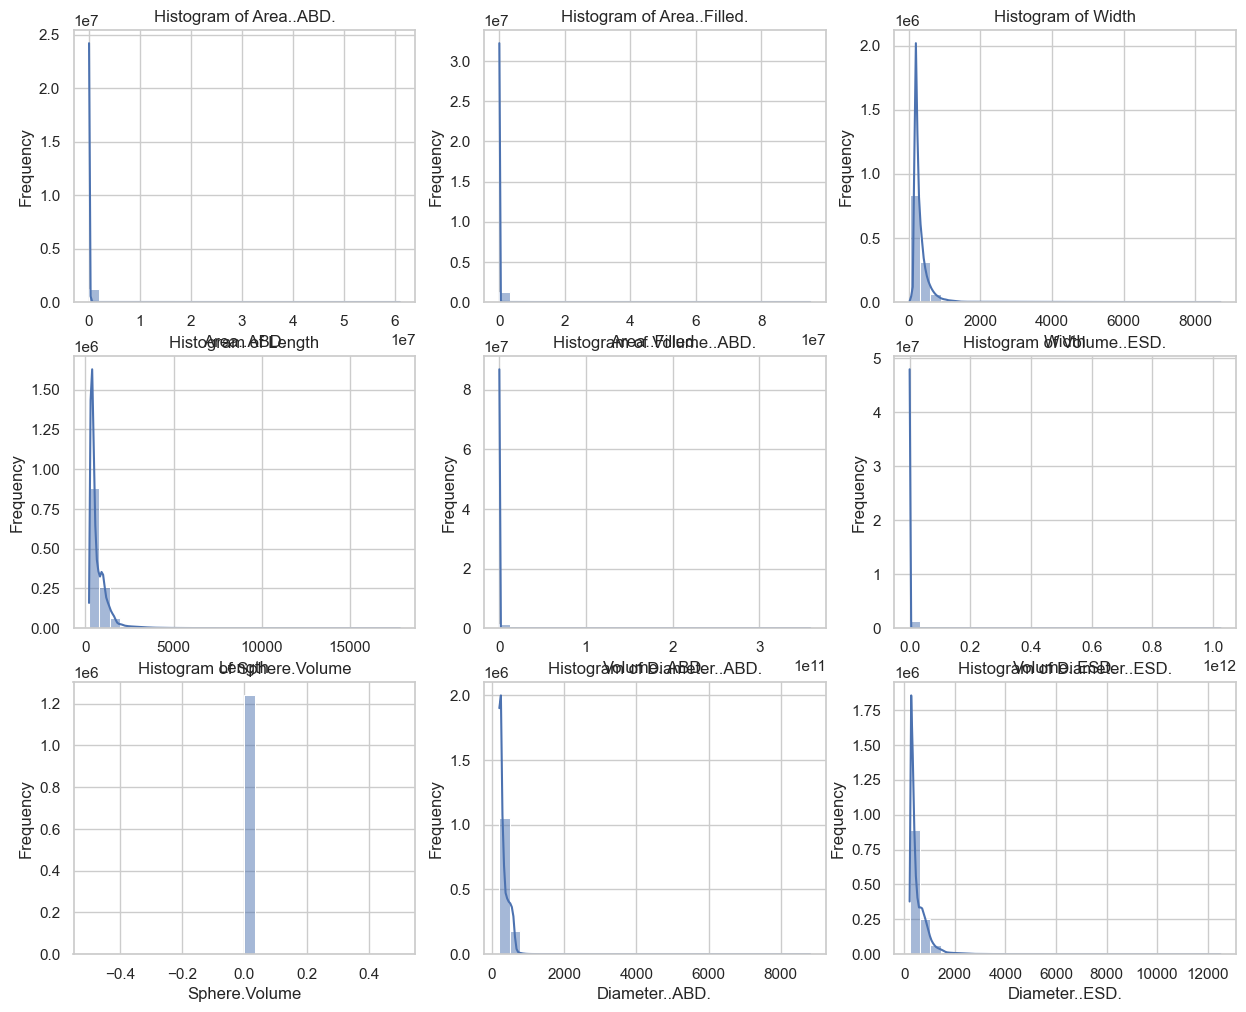

In [ ]:
# Selecting numerical columns for analysis
dimension_and_size_cols = [
    "Area..ABD.", "Area..Filled.", "Width", "Length", "Volume..ABD.", "Volume..ESD.", "Sphere.Volume", "Diameter..ABD.", "Diameter..ESD.", "Feret.Angle.Max", "Feret.Angle.Min"
]

structural_and_shape_cols = [
    "Symmetry", "Circularity", "Convexity", "Aspect.Ratio", "Compactness", "Elongation", "Fiber.Curl", "Fiber.Straightness", "Roughness"
]

optical_cols = [
    "Transparency", "Sum.Intensity", "Intensity", "Sigma.Intensity", "Edge.Gradient"
]

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

# Plot histograms and box plots for each numerical column
for i, col in enumerate(dimension_and_size_cols):
    # Histogram
    sns.histplot(merged_df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

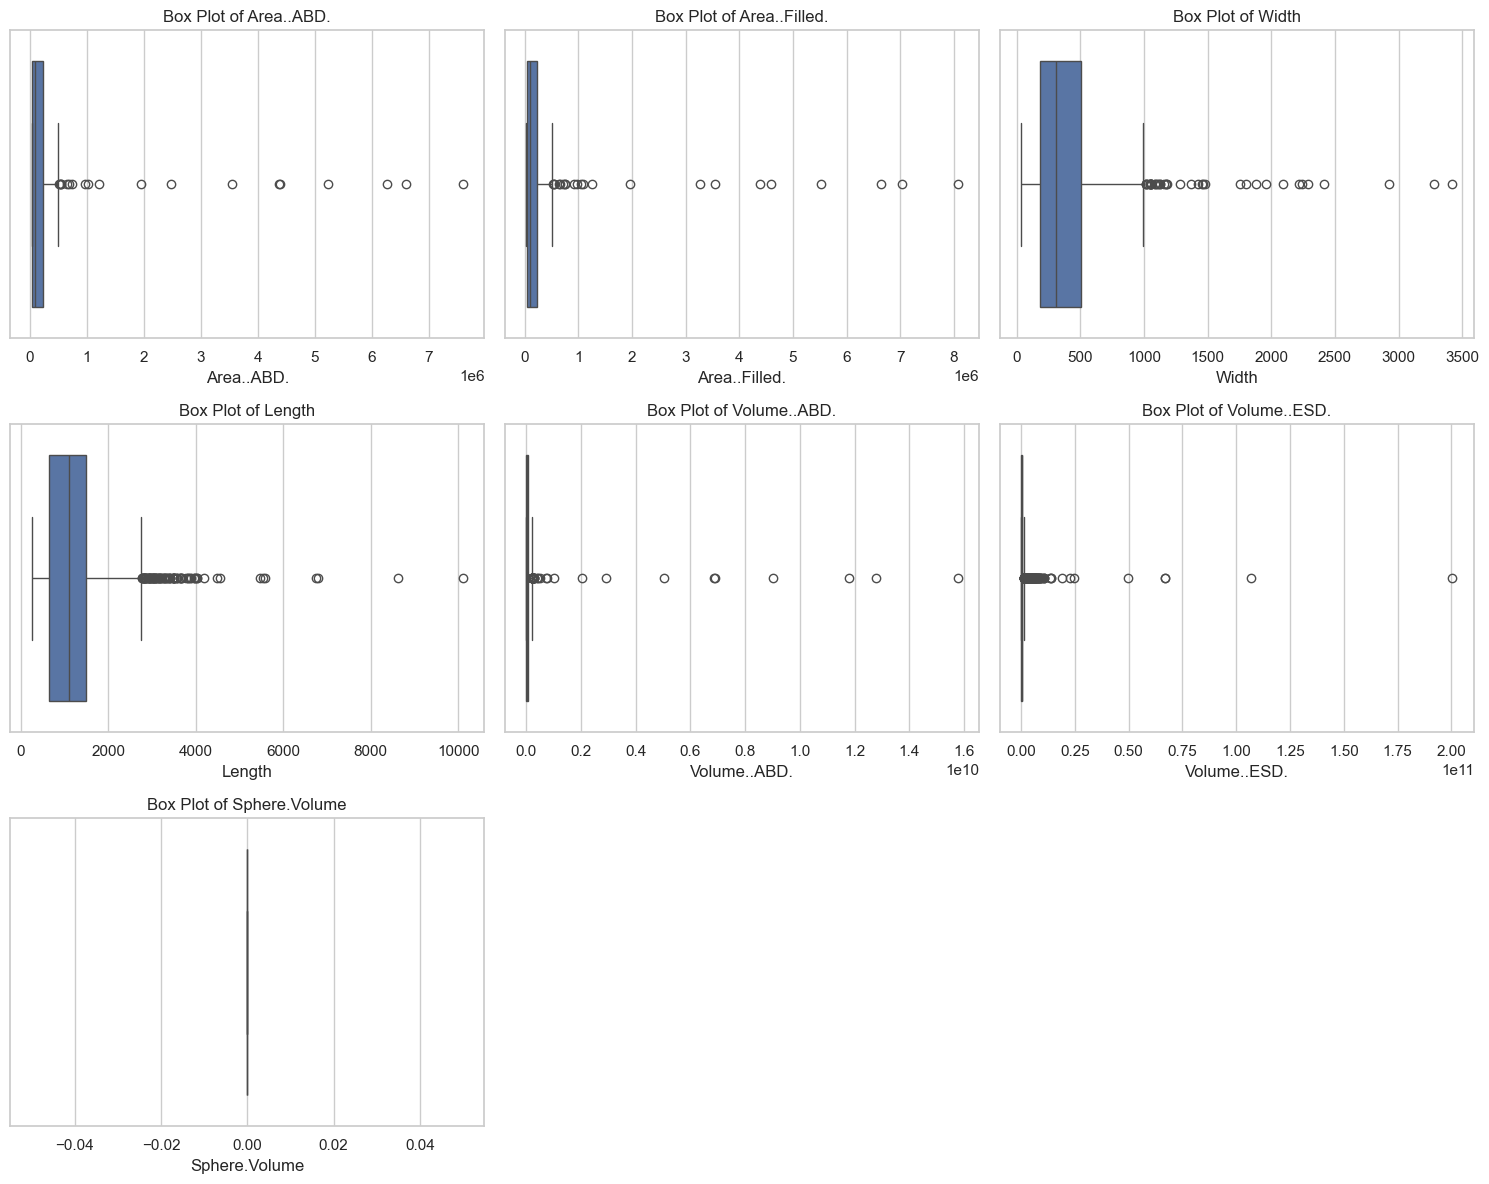

In [ ]:
# Create plots for box plots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(dimension_and_size_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_xlabel(col)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Now we'll take a close look at each features. First typical values I saw is that sphere.volume does not have data. Actually we can see that all values are 0 from the code below. Therefore, we'll exclude Sphere.Volume in our model. 

In [ ]:
print(merged_df['Sphere.Volume'].describe())
dimension_and_size_cols.remove('Sphere.Volume')

count    1239578.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: Sphere.Volume, dtype: float64


In [ ]:
# Exclude 'TooSmall' label
filtered_df = merged_df[merged_df['Class'] != 'TooSmall'].drop(columns=['Sphere.Volume'])
dimension_and_size_cols.remove('Sphere.Volume')

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot histogram for Area..ABD.
sns.histplot(filtered_df['Area..ABD.'], bins=30, ax=axes[0])
axes[0].set_title('Histogram of Area..ABD.')
axes[0].set_xlabel('Area..ABD.')
axes[0].set_ylabel('Frequency')
axes[0].set_ylim(0, 100)

# Plot histogram for Volume..ABD.
sns.histplot(filtered_df['Volume..ABD.'], bins=30, ax=axes[1])
axes[1].set_title('Histogram of Volume..ABD.')
axes[1].set_xlabel('Volume..ABD.')
axes[1].set_ylabel('Frequency')
axes[1].set_ylim(0, 100)

plt.tight_layout()
plt.show()

In [ ]:
area_abd_range = (filtered_df['Area..ABD.'].min(), filtered_df['Area..ABD.'].max())
volume_abd_range = (filtered_df['Volume..ABD.'].min(), filtered_df['Volume..ABD.'].max())

print(f"Range of Area..ABD.: {area_abd_range}")
print(f"Range of Volume..ABD.: {volume_abd_range}")

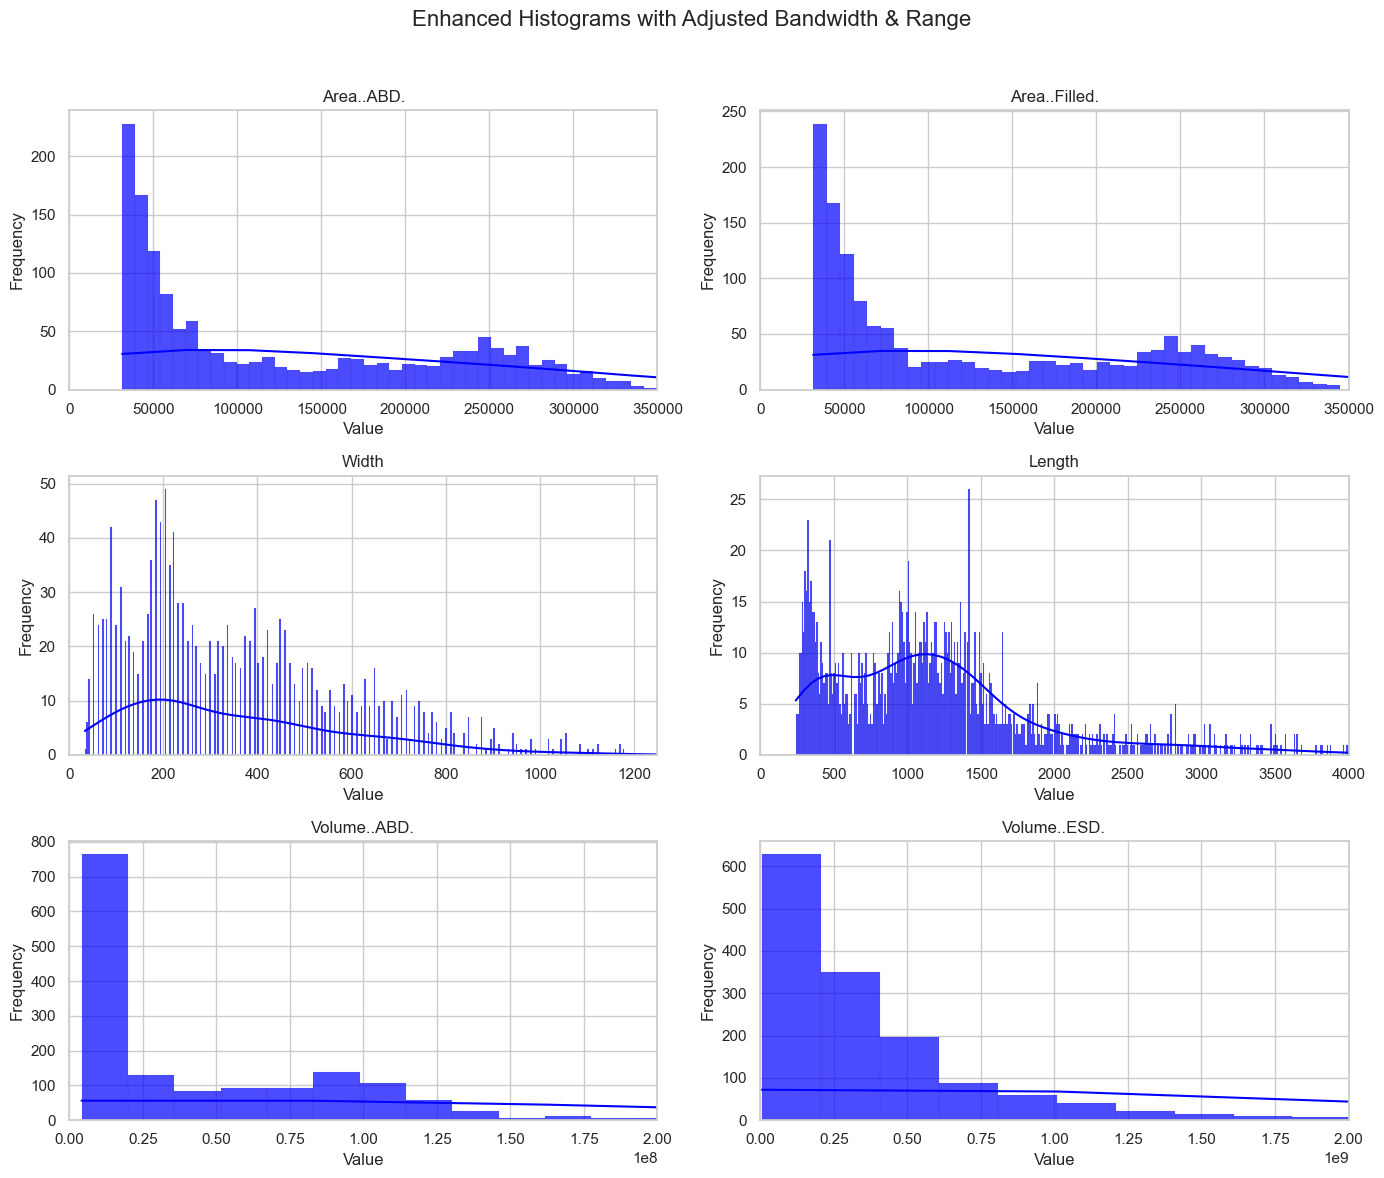

In [ ]:
# Define a larger figure size for better visibility
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
fig.suptitle("Enhanced Histograms with Adjusted Bandwidth & Range", fontsize=16)

# Custom bin settings for better resolution
custom_bins = {
    "Area..ABD.": 1000, 
    "Area..Filled.": 1000, 
    "Width": 1000, 
    "Length": 1000, 
    "Volume..ABD.": 1000, 
    "Volume..ESD." : 1000
}

# Custom x-axis limits to zoom in on common values
x_limits = {
    "Area..ABD.": (0, 0.35e6), 
    "Area..Filled.": (0, 0.35e6), 
    "Width": (0, 1250), 
    "Length": (0, 4000), 
    "Volume..ABD.": (0, 0.2e9), 
    "Volume..ESD." : (0, 0.2e10)
}

# Create histograms with KDE plots
for ax, col in zip(axes.flatten(), dimension_and_size_cols):
    sns.histplot(df[col], bins=custom_bins.get(col, 50), kde=True, ax=ax, color="blue", edgecolor="black", alpha=0.7)
    ax.set_title(col)
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

    # Apply x-axis limits if defined
    if col in x_limits:
        ax.set_xlim(x_limits[col])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

After I increased the number of bins, the quetsion arise is "whether there are any values with 0. If there are features with most 0, we need to delete it. However, after checking, I found that no columns have zero. 

In [ ]:
zero_values = {col: (merged_df[col] == 0).any() for col in dimension_and_size_cols}
print(zero_values)

{'Area..ABD.': False, 'Area..Filled.': False, 'Width': False, 'Length': False, 'Volume..ABD.': False, 'Volume..ESD.': False}


In [30]:
# Define a function to detect outliers using the IQR method
def detect_outliers_iqr(df, columns):
    outlier_dict = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_dict[col] = outliers
    return outlier_dict

# Apply outlier detection to selected numeric features
outlier_columns = ["Area..ABD.", "Aspect.Ratio", "Circularity", "Perimeter", "Intensity", "Transparency", "Volume..ABD.", "Width"]
outliers_iqr = detect_outliers_iqr(df, outlier_columns)

# Count and display the number of outliers for each feature
outlier_counts = {col: len(outliers) for col, outliers in outliers_iqr.items()}
outlier_counts

{'Area..ABD.': 19,
 'Aspect.Ratio': 0,
 'Circularity': 7,
 'Perimeter': 71,
 'Intensity': 0,
 'Transparency': 0,
 'Volume..ABD.': 35,
 'Width': 39}

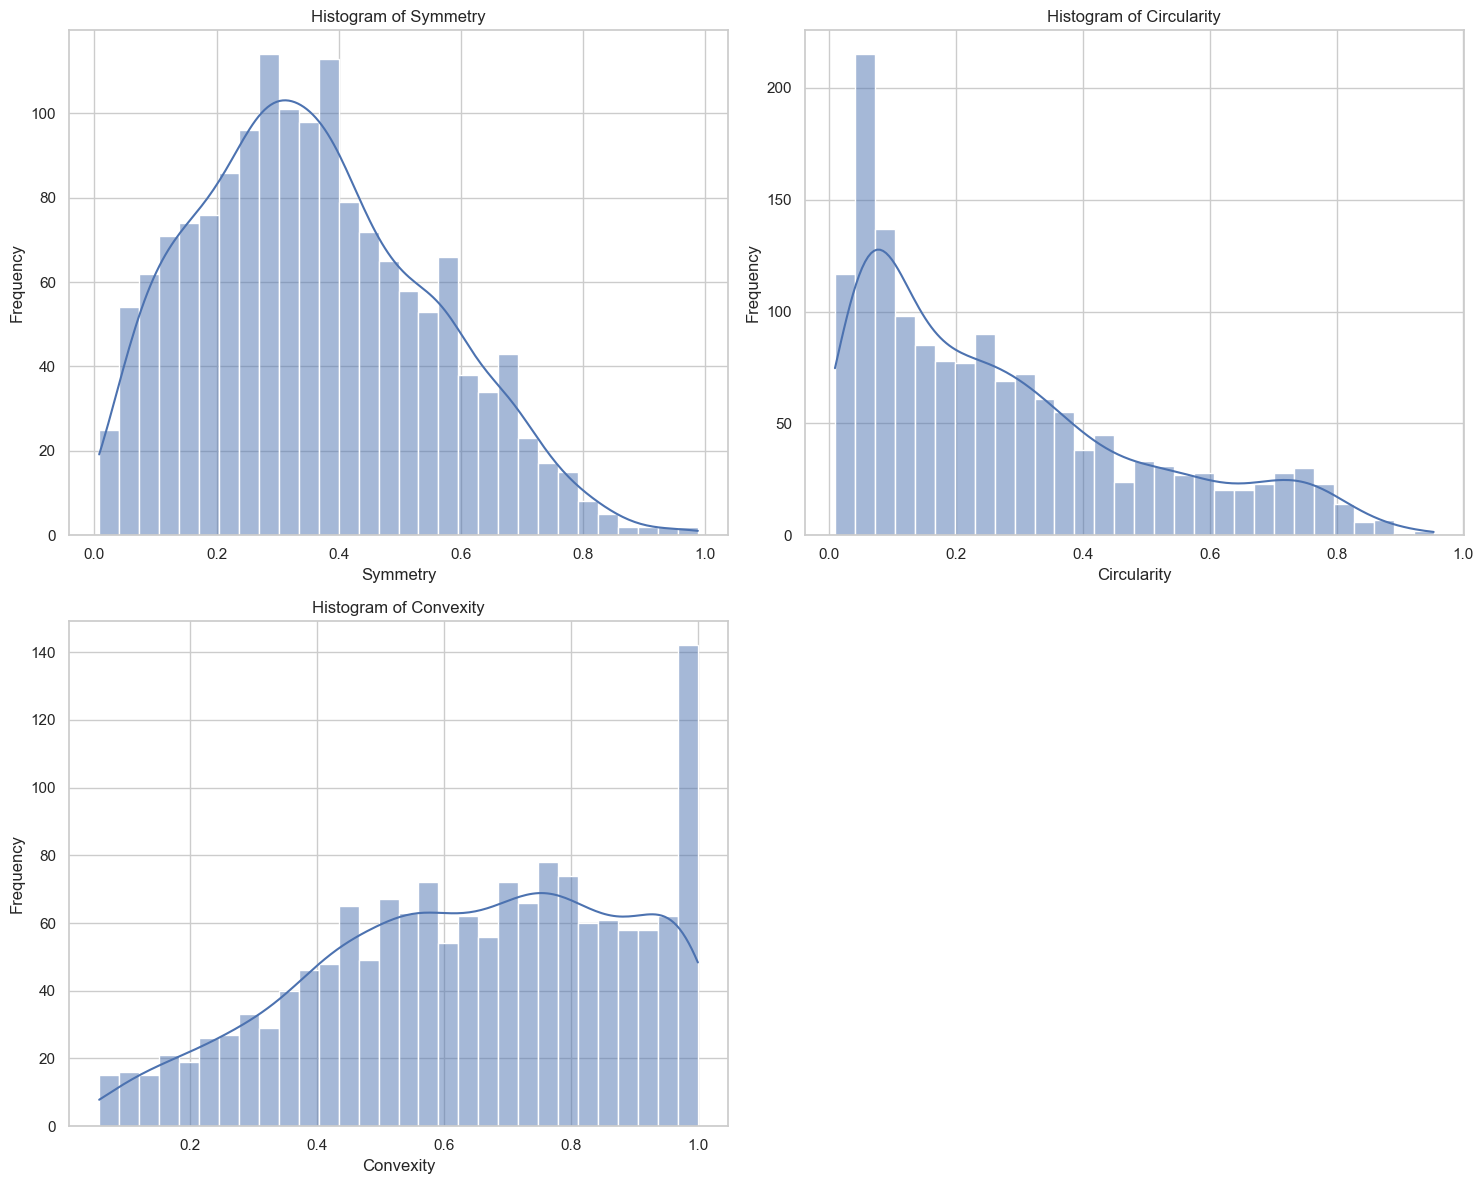

In [29]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
axes = axes.flatten()

# Plot histograms and box plots for each numerical column
for i, col in enumerate(structural_and_shape_cols):
    # Histogram
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

Now we will move on to find covariances between variables. As we seen in the boxplots, even single column has pretty wide range of values. Also between columns, their ranges are pretty big. So I decided to normalize to properly get covariance and visualize it with heatmap. 

['Area..ABD.', 'Area..Filled.', 'Width', 'Length', 'Volume..ABD.', 'Volume..ESD.', 'Sphere.Volume', 'Diameter..ABD.', 'Diameter..ESD.', 'Feret.Angle.Max', 'Feret.Angle.Min', 'Symmetry', 'Circularity', 'Convexity', 'Aspect.Ratio', 'Compactness', 'Elongation', 'Fiber.Curl', 'Fiber.Straightness', 'Roughness', 'Transparency', 'Sum.Intensity', 'Intensity', 'Sigma.Intensity', 'Edge.Gradient']
                      Area..ABD.  Area..Filled.         Width        Length  \
Area..ABD.          7.966034e+10   1.029549e+11  3.777926e+07  8.085260e+07   
Area..Filled.       1.029549e+11   1.421398e+11  4.587944e+07  9.625043e+07   
Width               3.777926e+07   4.587944e+07  5.350680e+04  9.814383e+04   
Length              8.085260e+07   9.625043e+07  9.814383e+04  3.493529e+05   
Volume..ABD.        2.398882e+14   3.300803e+14  6.771645e+10  1.302784e+11   
Volume..ESD.        1.022516e+15   1.400998e+15  5.545111e+11  1.524927e+12   
Sphere.Volume       0.000000e+00   0.000000e+00  0.000000

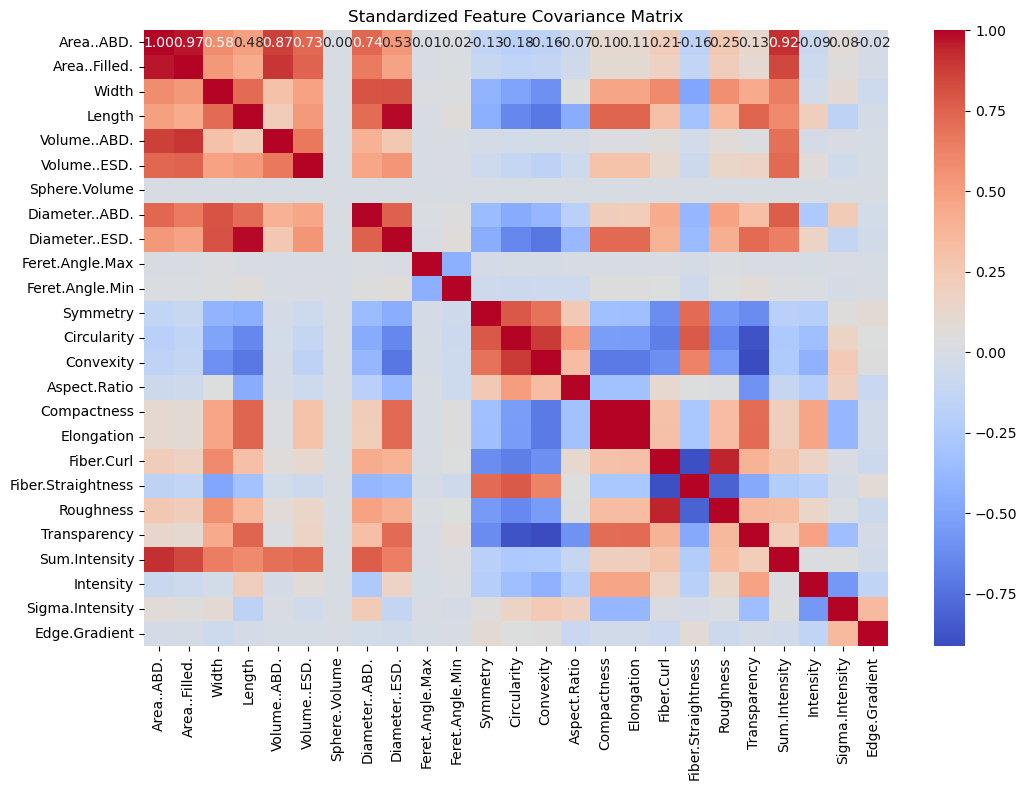

In [ ]:
selected_columns = dimension_and_size_cols + structural_and_shape_cols + optical_cols

cov_matrix = merged_df[selected_columns].cov()

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(merged_df[selected_columns]), columns=merged_df[selected_columns].columns)

cov_matrix_scaled = df_scaled.cov()

plt.figure(figsize=(12,8))
sns.heatmap(cov_matrix_scaled, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Standardized Feature Covariance Matrix")
plt.show()

차라리 이걸 맨 앞에서 써야겠다. 그리고 groupping 나누고 각 그룹별 histogram 그리면 대충 될 것 같은데?
말한대로 eda 에서 우리의 최대 관심사는 플랑크톤 몇개니까 그 나머지 애들은 빼고.
아니면 대충 내가 grouping 한게 맞았다 뭐 그런식으로다가 해도 될듯. 근데 처음게 더 나아보임임

After this, since one of the noticed problem of the dataset is unbalanced classes, we will investigate distribution of classes. As we can see, there is 'TooSmall' class, And toosmall class does not give any information about plankton itself, and 

C:\Users\sprin\AppData\Local\Temp\ipykernel_20928\106046080.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


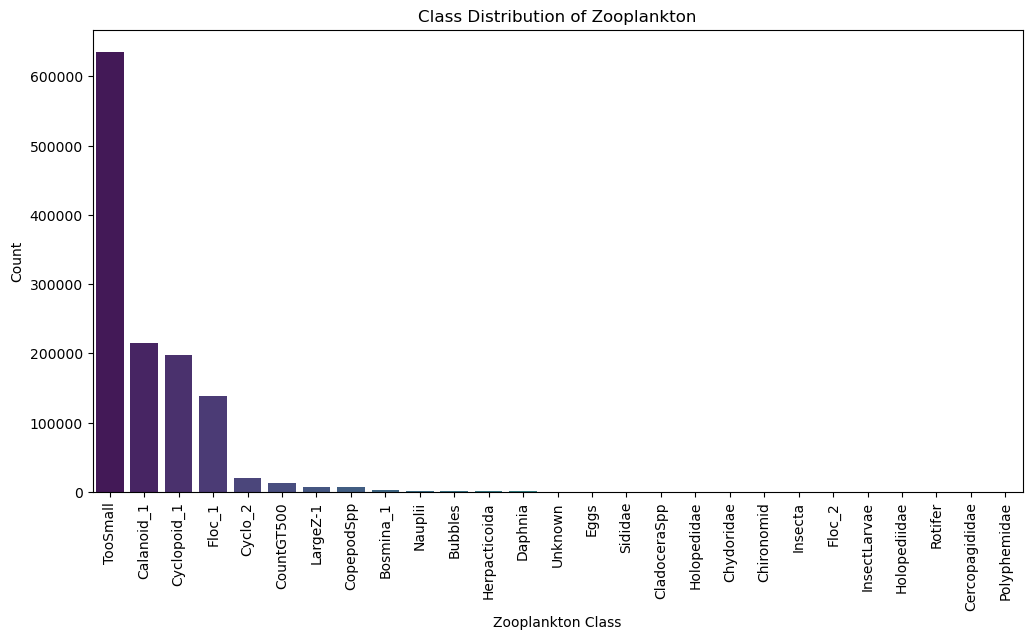

In [6]:
# Count occurrences of each class
class_counts = merged_df["Class"].value_counts()

# Plot class distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Zooplankton Class")
plt.ylabel("Count")
plt.title("Class Distribution of Zooplankton")
plt.show()


In [13]:
merged_df.dtypes
nunique = merged_df.select_dtypes(include=['int64', 'float64']).nunique()
single_value_columns = nunique[nunique == 1].index.tolist()
print("Columns with only one unique value:", single_value_columns)

Columns with only one unique value: ['Calibration.Factor', 'Camera', 'Particles.Per.Chain', 'Sphere.Complement', 'Sphere.Count', 'Sphere.Unknown', 'Sphere.Volume']


dimension_and_size_cols = [
    "Area..ABD.", "Area..Filled.", "Width", "Length", "Volume..ABD.", "Volume..ESD.", "Sphere.Volume", "Diameter..ABD.", "Diameter..ESD.", "Feret.Angle.Max", "Feret.Angle.Min"
]

structural_and_shape_cols = [
    "Symmetry", "Circularity", "Convexity", "Aspect.Ratio", "Compactness", "Elongation", "Fiber.Curl", "Fiber.Straightness", "Roughness"
]

optical_cols = [
    "Transparency", "Sum.Intensity", "Intensity", "Sigma.Intensity", "Edge.Gradient"
]